In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [2]:
df_train = pd.read_csv('train_data_features_clean.csv')
df_train.drop(columns = ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace = True)
df_test = pd.read_csv('test_data_features_clean.csv')
df_test.drop(columns = ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace = True)

In [3]:
df_train.drop(columns = ['Participant', 'IRange_start', 'IRange_end'], inplace = True)
df_test.drop(columns = ['Participant', 'IRange_start', 'IRange_end'], inplace = True)

In [4]:
X_train = df_train.drop(columns = ['Activity']).to_numpy()
y_train = df_train['Activity'].copy().values
X_test = df_test.drop(columns = ['Activity']).to_numpy()
y_test = df_test['Activity'].copy().values

In [5]:
scaler_cv = StandardScaler()
logistic_cv = LogisticRegression(penalty = 'elasticnet', max_iter = 30, random_state = 1913, solver = 'saga')
pipe_cv = Pipeline(steps=[("scaler", scaler_cv), ("logistic", logistic_cv)])

In [6]:
l1_ratios = [x/5 for x in range(0, 6)]
C_values = [0.2, 0.5, 1, 2, 5]
grid_cv = GridSearchCV(
    pipe_cv,
    param_grid = {'logistic__l1_ratio': l1_ratios, 'logistic__C': C_values},
    scoring = 'neg_log_loss',
    cv = 4)

In [7]:
#grid_cv.fit(X_train, y_train)

In [8]:
#pd.DataFrame(grid_cv.cv_results_)

In [9]:
'''
max_iter = 100
scaler = StandardScaler()
logistic = LogisticRegression(penalty = 'elasticnet', max_iter = max_iter, random_state = 1913, solver = 'saga', l1_ratio = 0.8, C = 1)
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('log loss:', log_loss(y_test, y_pred_prob))
result_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = pipe.classes_)
disp.plot()
plt.xticks(rotation = 90)
plt.show()
'''

'\nmax_iter = 100\nscaler = StandardScaler()\nlogistic = LogisticRegression(penalty = \'elasticnet\', max_iter = max_iter, random_state = 1913, solver = \'saga\', l1_ratio = 0.8, C = 1)\npipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])\npipe.fit(X_train, y_train)\ny_pred = pipe.predict(X_test)\ny_pred_prob = pipe.predict_proba(X_test)\nprint(\'Accuracy score:\', accuracy_score(y_test, y_pred))\nprint(\'log loss:\', log_loss(y_test, y_pred_prob))\nresult_matrix = confusion_matrix(y_test, y_pred, normalize = \'true\')\ndisp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = pipe.classes_)\ndisp.plot()\nplt.xticks(rotation = 90)\nplt.show()\n'

In [10]:
'''
max_iter = 300
scaler = StandardScaler()
logistic = LogisticRegression(penalty = 'elasticnet', max_iter = max_iter, random_state = 1913, solver = 'saga', l1_ratio = 0.8, C = 1)
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('log loss:', log_loss(y_test, y_pred_prob))
result_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = pipe.classes_)
disp.plot()
plt.xticks(rotation = 90)
plt.show()
'''

'\nmax_iter = 300\nscaler = StandardScaler()\nlogistic = LogisticRegression(penalty = \'elasticnet\', max_iter = max_iter, random_state = 1913, solver = \'saga\', l1_ratio = 0.8, C = 1)\npipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])\npipe.fit(X_train, y_train)\ny_pred = pipe.predict(X_test)\ny_pred_prob = pipe.predict_proba(X_test)\nprint(\'Accuracy score:\', accuracy_score(y_test, y_pred))\nprint(\'log loss:\', log_loss(y_test, y_pred_prob))\nresult_matrix = confusion_matrix(y_test, y_pred, normalize = \'true\')\ndisp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = pipe.classes_)\ndisp.plot()\nplt.xticks(rotation = 90)\nplt.show()\n'

C:\Users\larse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score: 0.9671814671814671
log loss: 0.1263051409310275


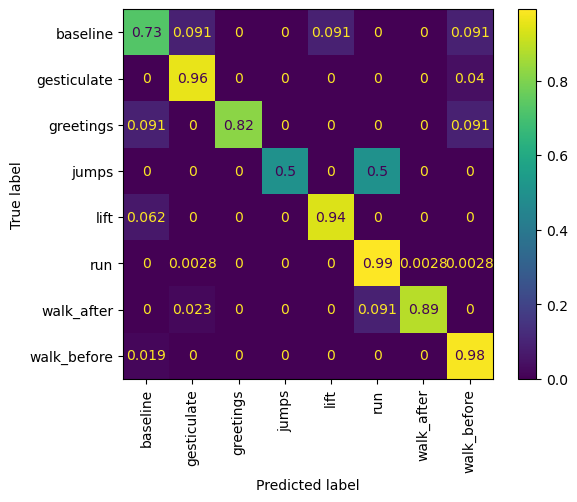

In [11]:
max_iter = 800
scaler = StandardScaler()
logistic = LogisticRegression(penalty = 'elasticnet', max_iter = max_iter, random_state = 1913, solver = 'saga', l1_ratio = 0.8, C = 1)
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('log loss:', log_loss(y_test, y_pred_prob))
result_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = result_matrix, display_labels = pipe.classes_)
disp.plot()
plt.xticks(rotation = 90)
plt.show()

In [12]:
classifier = pipe.named_steps['logistic']
features_names = df_train.columns[1:]
features_totsize = [sum([abs(class_coefs[i]) for class_coefs in classifier.coef_]) for i in range(0, len(features_names))]
importances = pd.DataFrame({'Feature': features_names, 'Importance': features_totsize}).sort_values('Importance', ascending = False)

In [13]:
importances.head(50)

,Feature,Importance
206,accCHx_npeaks,2.380782
165,accCHy_fft_abmean,1.598262
317,accWx_npeaks,1.591283
9,emg_power_band_1,1.252135
205,accCHx_abmean,1.241549
102,ecg_RR1,1.207847
309,accWx_max,1.189705
237,accCHz_ncount,1.186202
238,accCHz_pcount,1.186202
58,ppg_finger_a_S,1.180690
